In [89]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# module finds all the pathnames matching a specified pattern
import glob
# provides an easy interface to read and write a wide range of image data
import imageio
# for plotting arrays
import matplotlib.pyplot
# plots inside the notebook, not external window
%matplotlib inline

In [90]:
# class definition
class neuralNetwork:
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # learning rate
        self.lr = learningrate
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node
        # i to node j in the next layer
        # w11 w21
        # w12 w22 etc
        # self.wih = (numpy.random.rand(self.hnodes, self.inodes) - 0.5)
        # self.who = (numpy.random.rand(self.onodes, self.hnodes) - 0.5)
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # error is the (target - actual)
        output_errors = targets - final_outputs
        
        # hidden layer error is the output_errors, split by weights, 
        # recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), 
            numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), 
            numpy.transpose(inputs))
        
        pass
    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d arrays
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # for the hidden layer
        # -----------------------------
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        # -----------------------------
        
        # for the final output layer
        # -----------------------------
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        # -----------------------------
        
        return final_outputs

In [91]:
# number of input, hidden and output nodes
# -----------------------
# for the 28px by 28px images
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
# -----------------------

# learning rate is 0.3
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [92]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [93]:
# train the neural network

# epoch is the number of times the training data set is used for 
# training
epoch = 10

for e in range(epoch):
# go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired
        # label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
pass




In [94]:
# the test data set, our handwriten numbers
test_dataset = []

for image_file_name in glob.glob('my_images/num_?.png'):
    print("loading:", image_file_name)
    # we set the label from the filename
    label = int(image_file_name[-5:-4])
    # image data from png files into an array
    img_array = imageio.imread(image_file_name, as_gray=True)
    # invert values
    img_data  = 255.0 - img_array.reshape(784)
    # scale values to range from 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    # record = label + the image data
    record = numpy.append(label,img_data)
    # append the record to the test data set
    test_dataset.append(record)
    pass    

    
print("done")

loading: my_images/num_1.png
loading: my_images/num_4.png
loading: my_images/num_6.png
loading: my_images/num_0.png
loading: my_images/num_9.png
loading: my_images/num_7.png
loading: my_images/num_2.png
loading: my_images/num_8.png
loading: my_images/num_5.png
loading: my_images/num_3.png
done


network output:  3
correct answer:  1
no match!


network output:  7
correct answer:  4
no match!


network output:  3
correct answer:  6
no match!


network output:  3
correct answer:  0
no match!


network output:  7
correct answer:  9
no match!


network output:  4
correct answer:  7
no match!


network output:  2
correct answer:  2
match!


network output:  3
correct answer:  8
no match!


network output:  3
correct answer:  5
no match!


network output:  3
correct answer:  3
match!




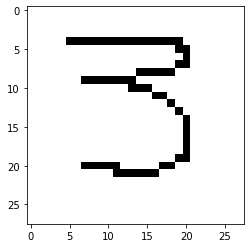

In [95]:
# test the neural network with the handwriten numbers

# scorecard for how well the network performs, initially empty
scorecard = []

# print(len(test_dataset))
for i in range(len(test_dataset)):
    # record to test
    item = i

    # plot image
    matplotlib.pyplot.imshow(test_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

    # correct answer
    correct_label = test_dataset[item][0]
    # image data
    inputs = test_dataset[item][1:]

    # query the network
    outputs = n.query(inputs)
    # print (outputs)

    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    print("network output: ", label)
    print("correct answer: ", int(correct_label))
    # append correct or incorrect to list
    if (label == correct_label):
        print ("match!")
        scorecard.append(1)
    else:
        print ("no match!")
        scorecard.append(0)
        pass
    
    print("\n")
    pass

In [96]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / 
    scorecard_array.size)

performance =  0.2
